In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [119]:
df = pd.read_csv('df.csv') 

In [73]:
df = df.drop(columns=['Unnamed: 0'])

In [74]:
df

,Timestamp,OutboundUtilzation (%)
0,2017-10-10 07:01:36,96.2442
1,2017-10-10 07:21:36,99.1131
2,2017-10-10 07:26:36,97.2892
3,2017-10-10 07:31:36,98.0286
4,2017-10-10 07:36:36,99.5263
...,...,...
46321,2018-03-25 23:43:03,65.8425
46322,2018-03-25 23:48:03,56.8811
46323,2018-03-25 23:53:03,43.6352
46324,2018-03-25 23:58:03,48.9415


In [75]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')
df = df.resample('1H').mean()
df = df.interpolate(limit=1)
mean = df.mean()
df = df.fillna(value=mean)


In [76]:
df = df.reset_index()

In [77]:
df['time'] = df['Timestamp']

#df['time'] = pd.to_datetime(pd.Series(df['time']))
df = df.rename(columns={"OutboundUtilzation (%)": "cnt"})

df.index = df.time

df['weekday'] = df.time.dt.weekday

df['hour'] = df.time.dt.hour

In [ ]:
df

In [78]:
df['Timestamp'] = df.Timestamp.astype(str)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4002 entries, 2017-10-10 07:00:00 to 2018-03-26 00:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  4002 non-null   object        
 1   cnt        4002 non-null   float64       
 2   time       4002 non-null   datetime64[ns]
 3   weekday    4002 non-null   int64         
 4   hour       4002 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 187.6+ KB


In [117]:
def day_splitter(df):
    l = []
    for day in range(7):
        d = df[df['weekday']==day]
        l.append(d)
    return l

dfs = day_splitter(df)
len(dfs)

print(len(dfs[0]))
dfs[0].head()

553


,Timestamp,cnt,time,weekday,hour,SerialNo,anomaly
time,,,,,,,
2017-10-16 00:00:00,2017-10-16 00:00:00,77.812958,2017-10-16 00:00:00,0,0,137,0
2017-10-16 01:00:00,2017-10-16 01:00:00,75.861633,2017-10-16 01:00:00,0,1,138,0
2017-10-16 02:00:00,2017-10-16 02:00:00,79.393689,2017-10-16 02:00:00,0,2,139,0
2017-10-16 03:00:00,2017-10-16 03:00:00,75.646525,2017-10-16 03:00:00,0,3,140,0
2017-10-16 04:00:00,2017-10-16 04:00:00,73.600642,2017-10-16 04:00:00,0,4,141,0


In [81]:
def day_splitter(df):
    l = []
    for day in range(7):
        d = df[df['weekday']==day]
        l.append(d)
    return l

dfs = day_splitter(df)
len(dfs)


print(len(dfs[0]))
dfs[0].head()

553


,Timestamp,cnt,time,weekday,hour
time,,,,,
2017-10-16 00:00:00,2017-10-16 00:00:00,77.812958,2017-10-16 00:00:00,0,0
2017-10-16 01:00:00,2017-10-16 01:00:00,75.861633,2017-10-16 01:00:00,0,1
2017-10-16 02:00:00,2017-10-16 02:00:00,79.393689,2017-10-16 02:00:00,0,2
2017-10-16 03:00:00,2017-10-16 03:00:00,75.646525,2017-10-16 03:00:00,0,3
2017-10-16 04:00:00,2017-10-16 04:00:00,73.600642,2017-10-16 04:00:00,0,4


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4002 entries, 2017-10-10 07:00:00 to 2018-03-26 00:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  4002 non-null   object        
 1   cnt        4002 non-null   float64       
 2   time       4002 non-null   datetime64[ns]
 3   weekday    4002 non-null   int64         
 4   hour       4002 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 187.6+ KB


In [83]:
def hour_splitter(df):
    l = []
    for hour in range(24):
        try:
            d = df[df['hour']==hour]
            l.append(d)
        except KeyError: pass
    return l


In [84]:
def get_dfs(dfs):
    l = []
    for df in dfs:
        l.extend(hour_splitter(df))
    return l

In [85]:
def anomaly_detector(df):
    m, s = df.mean()[0], df.std()[0]
    cutoff = s*3
    lower, upper = m - cutoff, m + cutoff
    anomalies = df['cnt'].apply(lambda x: x<lower or x>upper)
    idx = anomalies.values.reshape(-1)
    return idx

final_dfs = get_dfs(dfs)

len(final_dfs)

anomaly = []


for f_df in final_dfs:
    l = anomaly_detector(f_df)
    for i in range(len(l)):
        if l[i]: 
            d_time = f_df.iloc[i].time
            anomaly.append(d_time)
            
            
df['SerialNo'] = range(len(df))
df.head()

<ipython-input-85-db5020fa3994>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  m, s = df.mean()[0], df.std()[0]


,Timestamp,cnt,time,weekday,hour,SerialNo
time,,,,,,
2017-10-10 07:00:00,2017-10-10 07:00:00,90.397000,2017-10-10 07:00:00,1,7,0
2017-10-10 08:00:00,2017-10-10 08:00:00,74.493000,2017-10-10 08:00:00,1,8,1
2017-10-10 09:00:00,2017-10-10 09:00:00,68.930125,2017-10-10 09:00:00,1,9,2
2017-10-10 10:00:00,2017-10-10 10:00:00,52.874208,2017-10-10 10:00:00,1,10,3
2017-10-10 11:00:00,2017-10-10 11:00:00,58.498275,2017-10-10 11:00:00,1,11,4


In [86]:
a = []
for l in df.time.tolist():
    if l in anomaly: a.append(1)
    else: a.append(0)

In [87]:
df['anomaly'] = a

In [88]:
df['anomaly'].value_counts()

0    3987
1      15
Name: anomaly, dtype: int64

In [89]:
no_anomaly_df = df[df.anomaly==0]
anomaly_df = df[df.anomaly==1]

In [111]:
no_anomaly_df

,Timestamp,cnt,time,weekday,hour,SerialNo,anomaly
time,,,,,,,
2017-10-10 07:00:00,2017-10-10 07:00:00,90.397000,2017-10-10 07:00:00,1,7,0,0
2017-10-10 08:00:00,2017-10-10 08:00:00,74.493000,2017-10-10 08:00:00,1,8,1,0
2017-10-10 09:00:00,2017-10-10 09:00:00,68.930125,2017-10-10 09:00:00,1,9,2,0
2017-10-10 10:00:00,2017-10-10 10:00:00,52.874208,2017-10-10 10:00:00,1,10,3,0
2017-10-10 11:00:00,2017-10-10 11:00:00,58.498275,2017-10-10 11:00:00,1,11,4,0
...,...,...,...,...,...,...,...
2018-03-25 20:00:00,2018-03-25 20:00:00,30.050225,2018-03-25 20:00:00,6,20,3997,0
2018-03-25 21:00:00,2018-03-25 21:00:00,11.864578,2018-03-25 21:00:00,6,21,3998,0
2018-03-25 22:00:00,2018-03-25 22:00:00,24.694371,2018-03-25 22:00:00,6,22,3999,0


In [108]:
anomaly_df

,Timestamp,cnt,time,weekday,hour,SerialNo,anomaly
time,,,,,,,
2017-11-14 05:00:00,2017-11-14 05:00:00,25.346100,2017-11-14 05:00:00,1,5,838,1
2018-01-07 00:00:00,2018-01-07 00:00:00,20.132166,2018-01-07 00:00:00,6,0,2129,1
2018-01-07 02:00:00,2018-01-07 02:00:00,28.787192,2018-01-07 02:00:00,6,2,2131,1
2018-01-07 10:00:00,2018-01-07 10:00:00,10.681810,2018-01-07 10:00:00,6,10,2139,1
2018-01-07 11:00:00,2018-01-07 11:00:00,8.251408,2018-01-07 11:00:00,6,11,2140,1
2018-01-08 00:00:00,2018-01-08 00:00:00,15.838093,2018-01-08 00:00:00,0,0,2153,1
2018-01-08 01:00:00,2018-01-08 01:00:00,6.528102,2018-01-08 01:00:00,0,1,2154,1
2018-01-08 02:00:00,2018-01-08 02:00:00,9.023074,2018-01-08 02:00:00,0,2,2155,1
2018-01-08 03:00:00,2018-01-08 03:00:00,38.341283,2018-01-08 03:00:00,0,3,2156,1


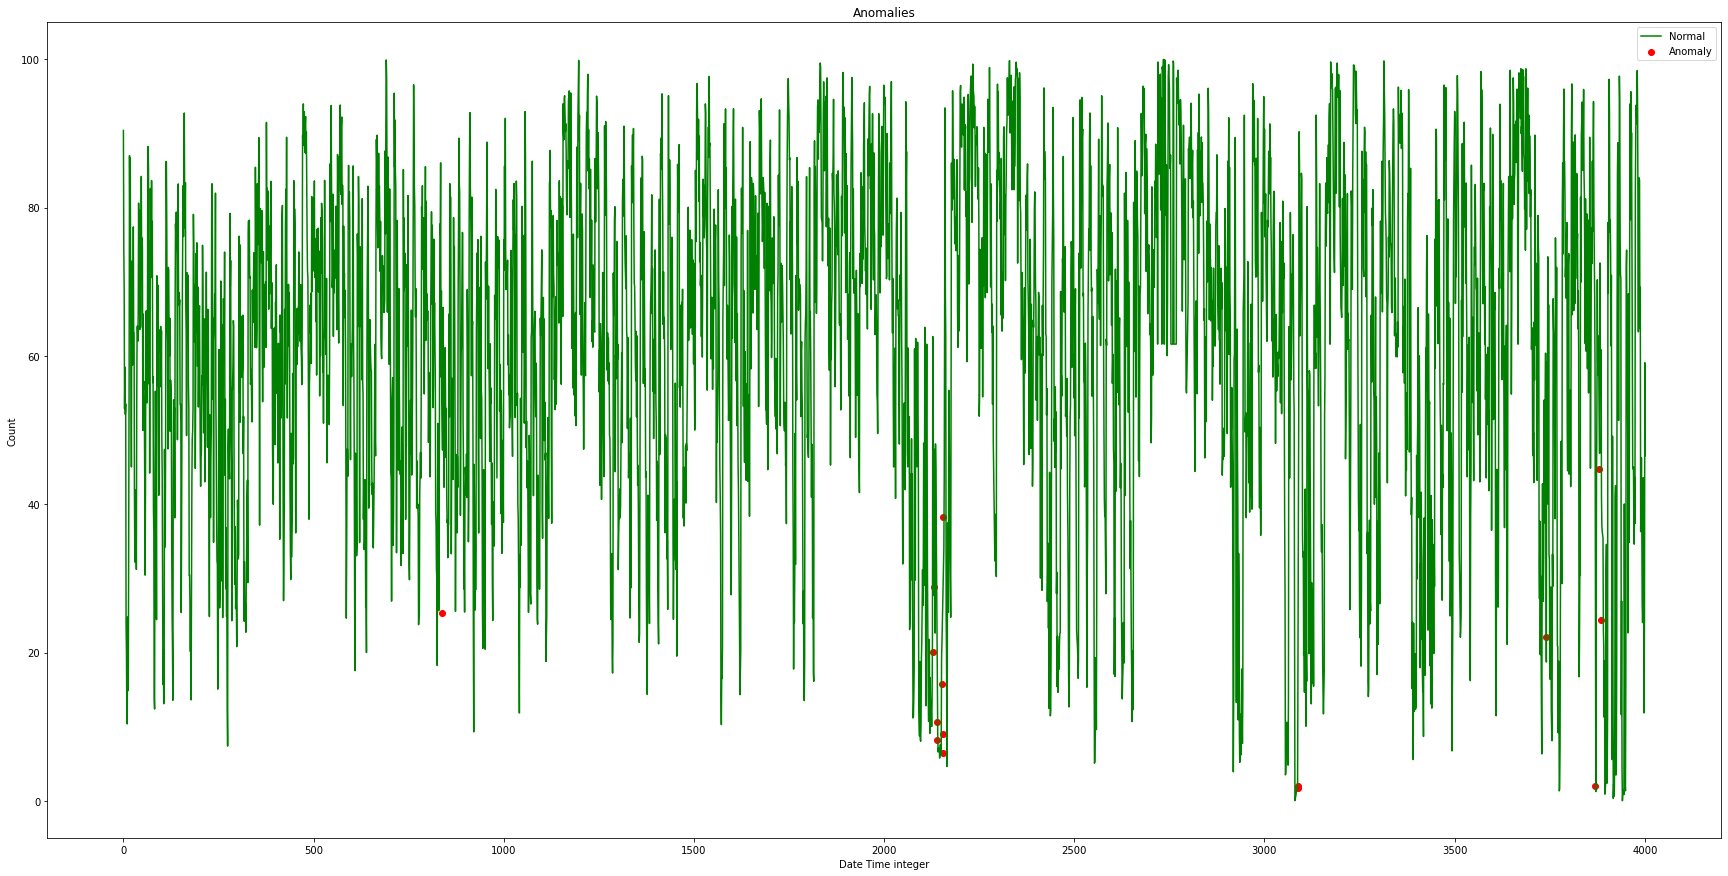

In [120]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.scatter(anomaly_df['SerialNo'], anomaly_df['cnt'], color='red', label='Anomaly')
ax.plot(no_anomaly_df['SerialNo'], no_anomaly_df['cnt'], color='green', label='Normal')
plt.title('Anomalies')
plt.xlabel('Date Time integer')
plt.ylabel('Count')
plt.legend()
plt.show()

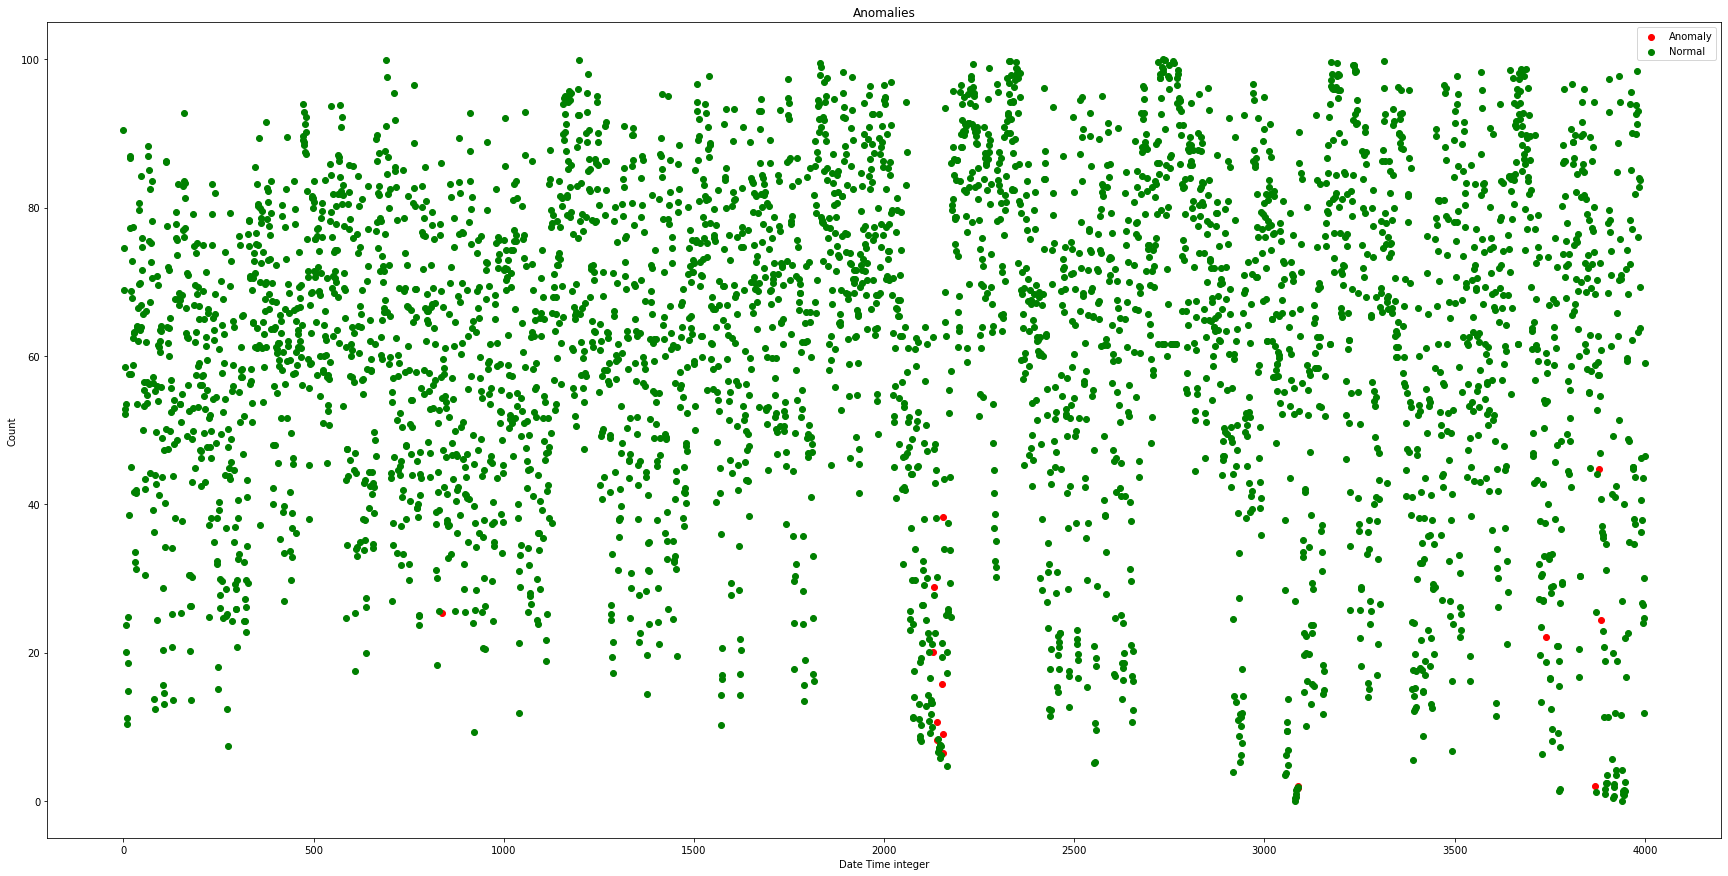

In [107]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.scatter(anomaly_df['SerialNo'], anomaly_df['cnt'], color='red', label='Anomaly')
ax.scatter(no_anomaly_df['SerialNo'], no_anomaly_df['cnt'], color='green', label='Normal')
plt.title('Anomalies')
plt.xlabel('Date Time integer')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
fig = kdeplot.get_figure()

fig.savefig("output2.png", dpi=300)